# FRAUD DETECTION 
This dataset contain transactions made by credit cards in September 2013 by European cardholders.

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import scipy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]



In [65]:
df=pd.read_csv("C:/Users/sahak/Downloads/internship/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [67]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [68]:
df.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

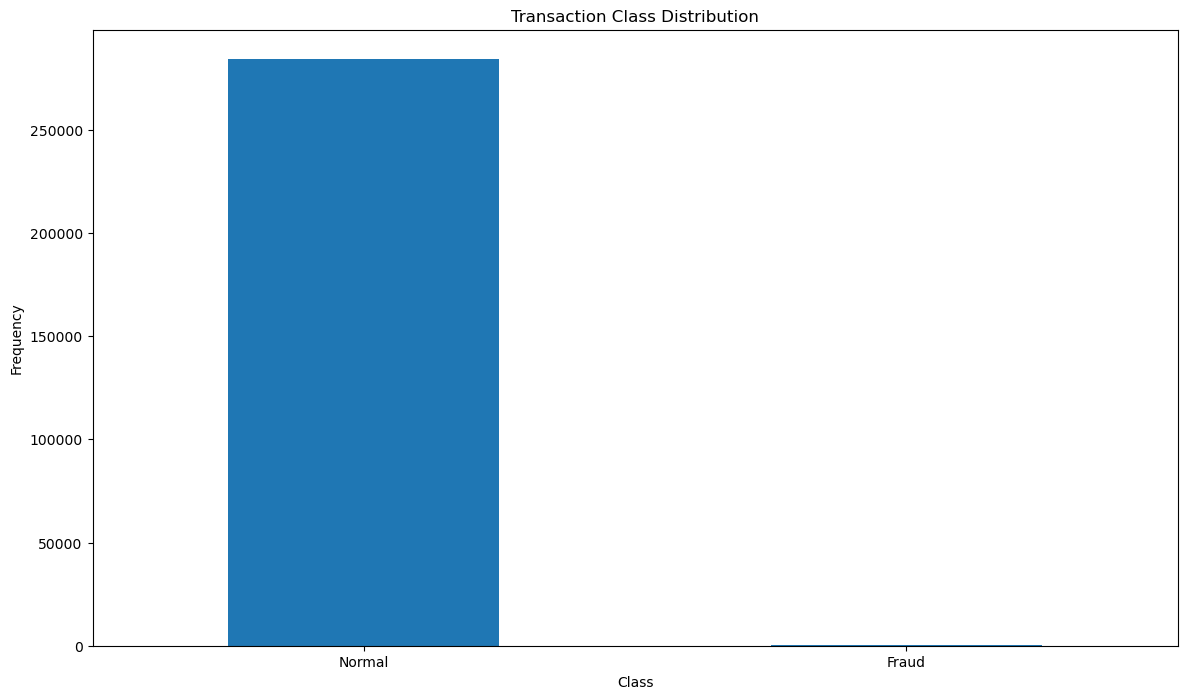

In [69]:
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

  This code effectively visualizes the distribution of transaction classes in the DataFrame using a bar chart.

In [70]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [71]:
fraud.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [72]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

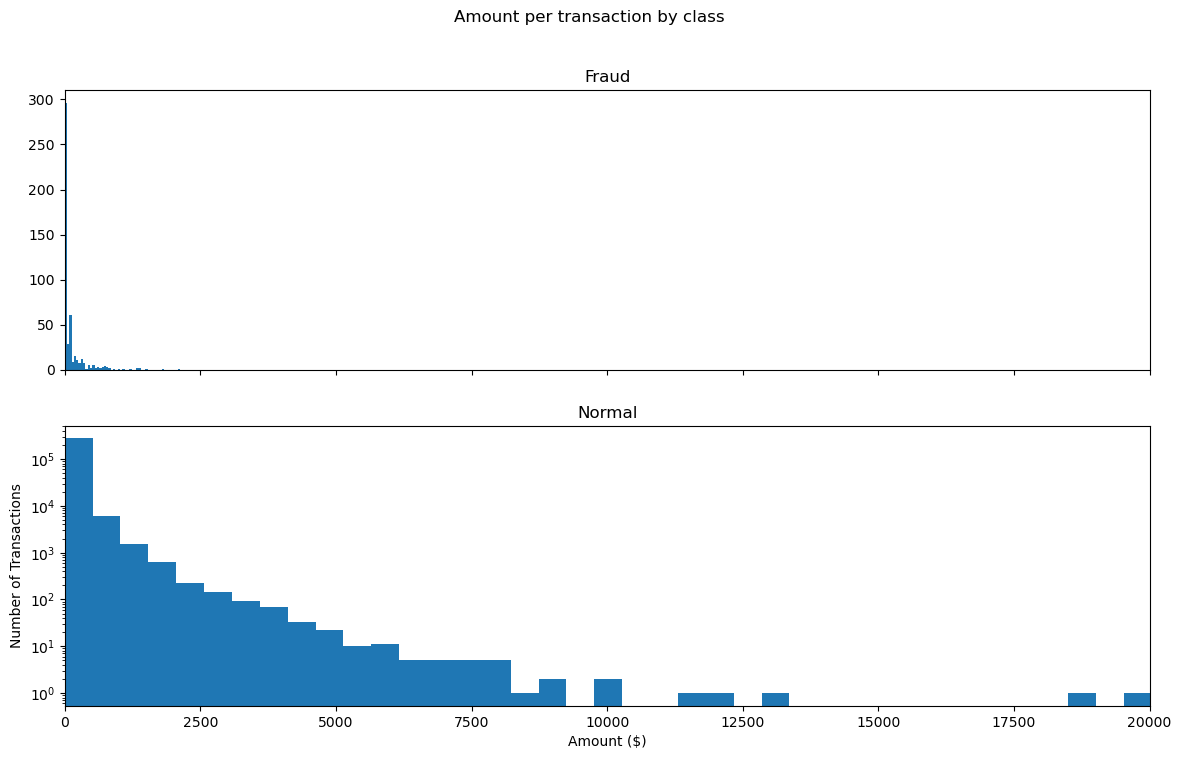

In [73]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

This code effectively compares the distribution of transaction amounts between fraudulent and normal transactions using two synchronized histograms on a single figure.

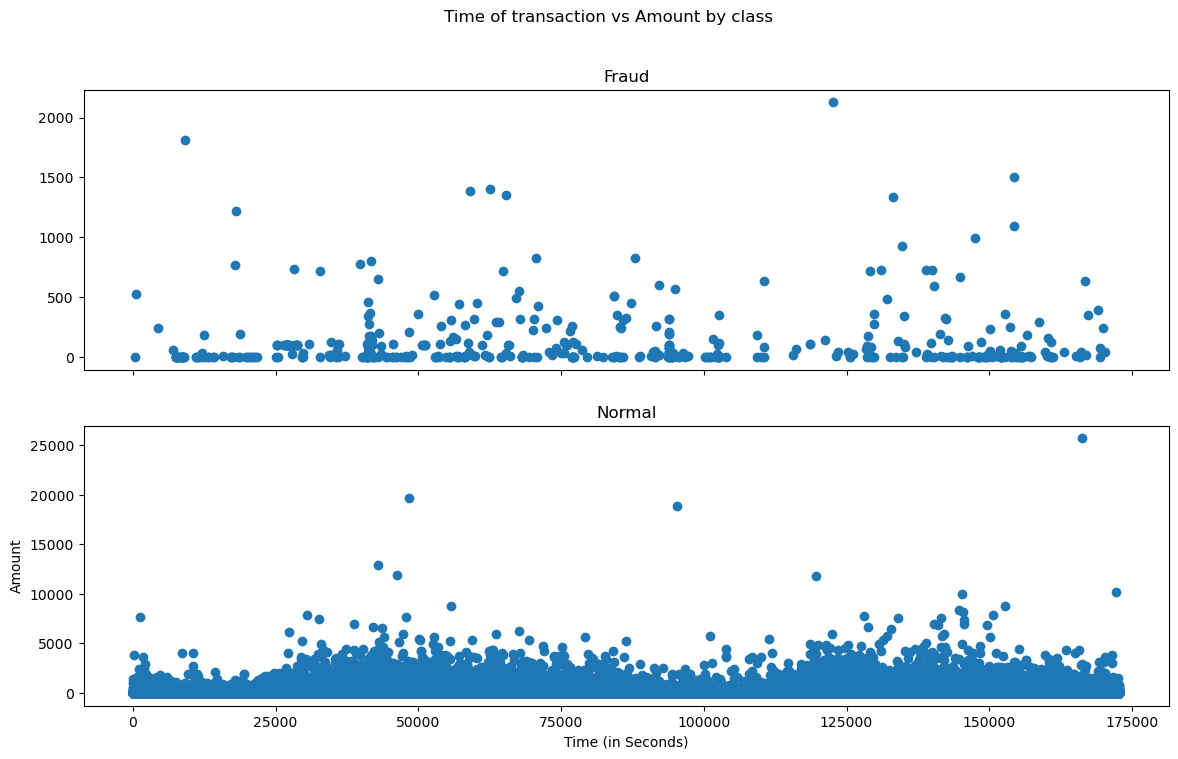

In [74]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()



This code helps visualize if there are any patterns or trends in transaction time compared to amount for both fraudulent and normal transactions. By using scatter plots with shared x-axis, we can easily compare these relationships between the two categories.

In [75]:
## Take some sample of the data

df1= df.sample(frac = 0.1,random_state=1)

df1.shape

(28481, 31)

In [76]:
df.shape

(284807, 31)

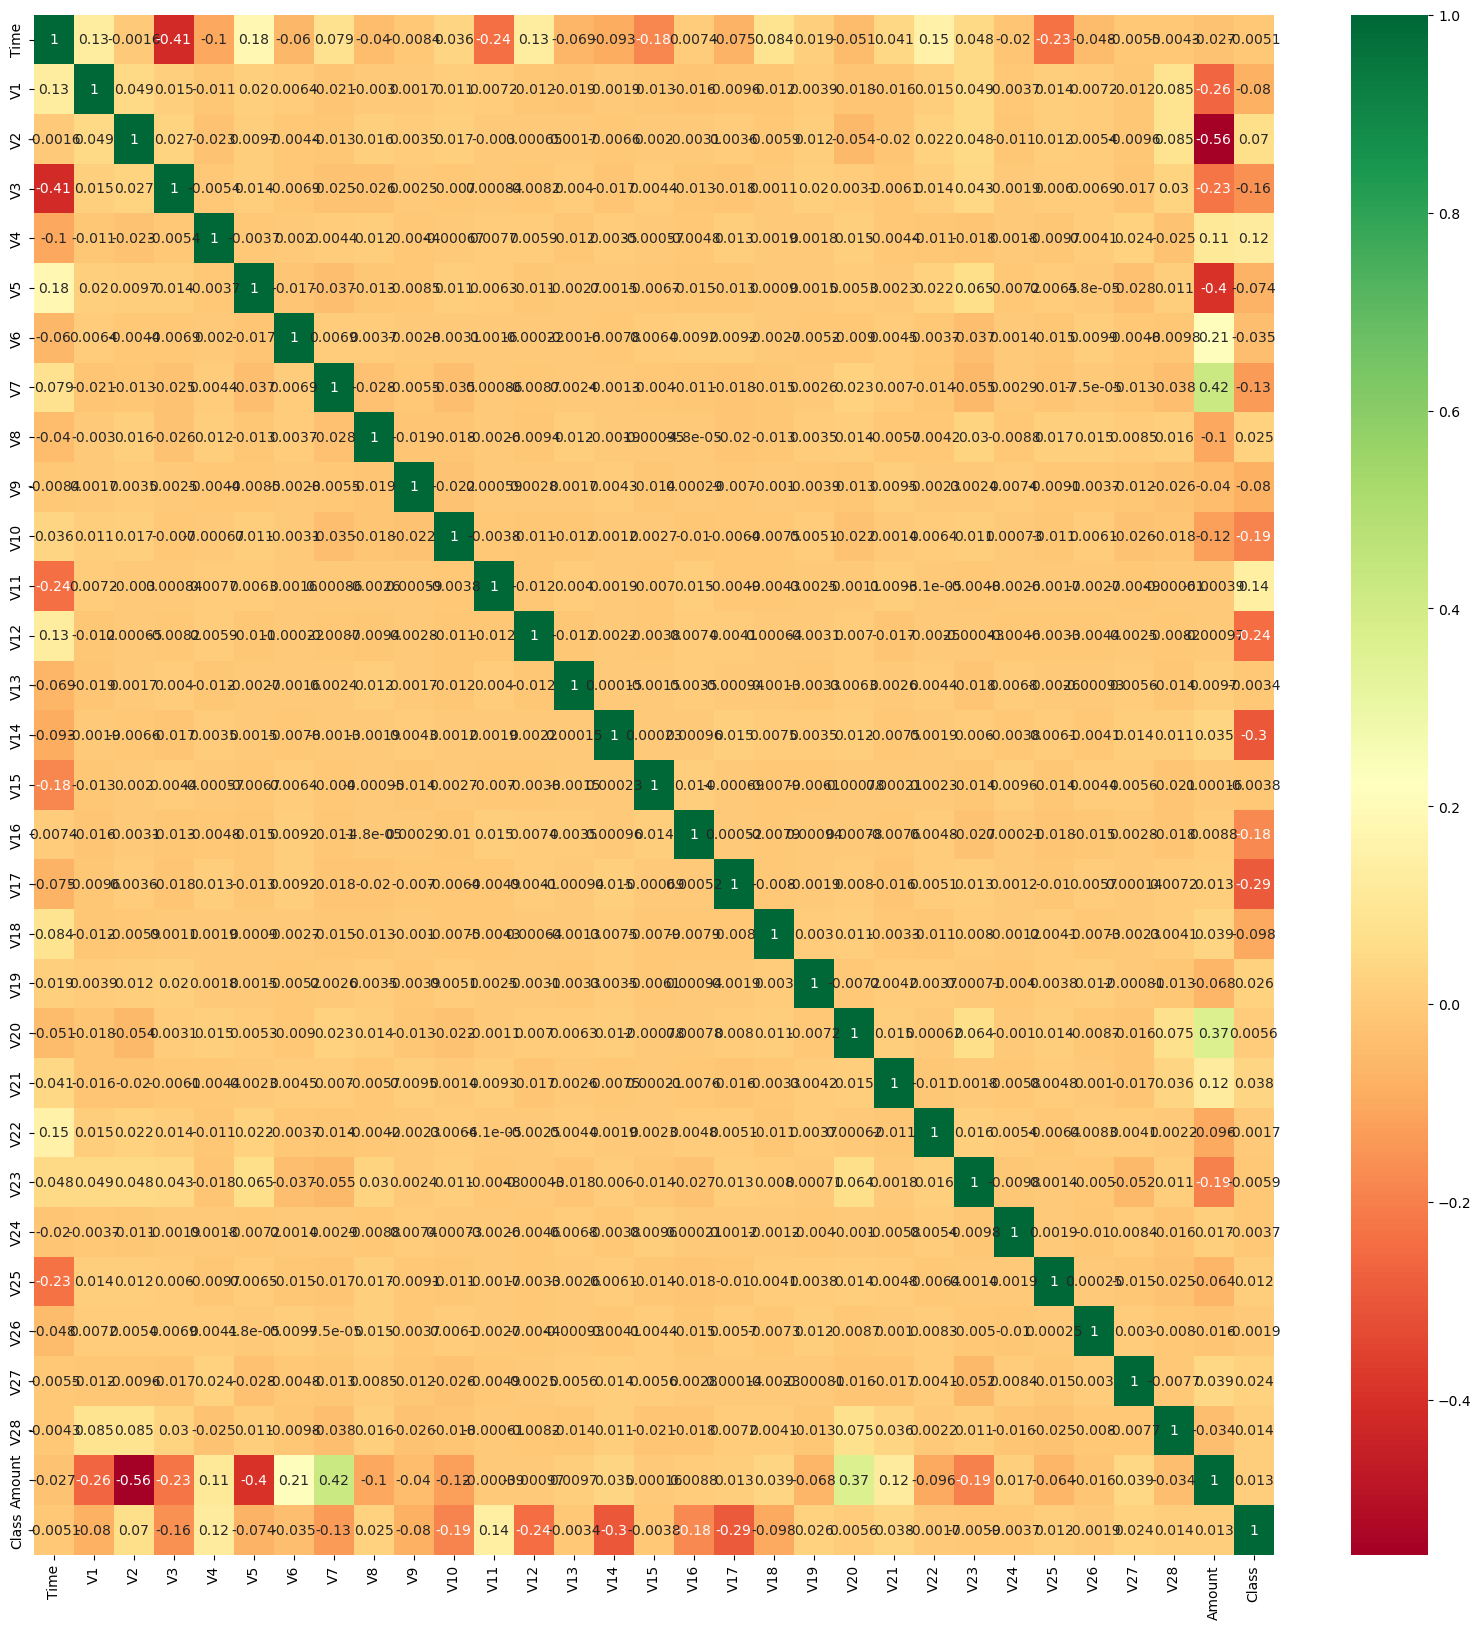

In [77]:
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

1. Red: Indicates a negative correlation between the two features represented by the row and column labels. The deeper the red, the stronger the negative correlation.
2. Yellow: Indicates no correlation between the features.
3. Green: Indicates a positive correlation between the features. The deeper the green, the stronger the positive correlation.

 The numerical values within the squares represent the correlation coefficient between the corresponding features.
By examining the heatmap, we can identify which features in our DataFrame have strong positive or negative correlations with each other. 

In [78]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [79]:
Fraud = df[df['Class']==1]

Valid = df[df['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [80]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


In [81]:
X = df.drop(columns=['Class'])
y = df['Class']

# Standardize the 'amount' feature and the rest of the features
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])
X.iloc[:, :-1] = scaler.fit_transform(X.iloc[:, :-1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56855     9]
 [   41    57]]


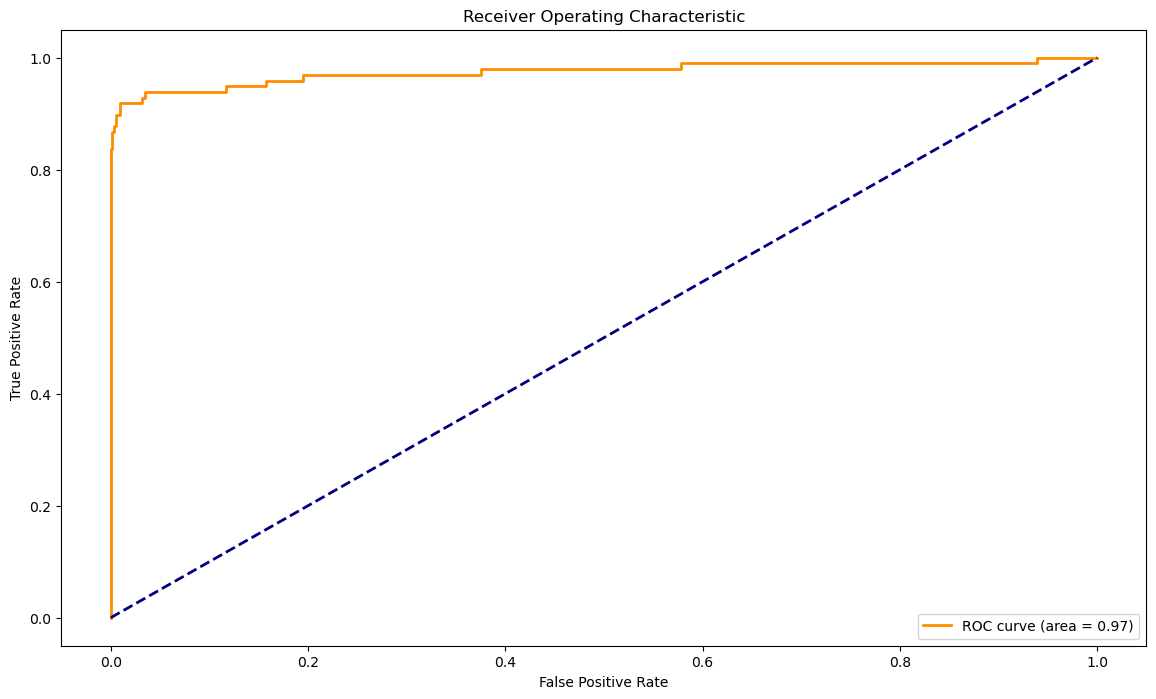

In [82]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


This metric measures how many of the predicted positive class labels (1) were actually correct. Here, precision for class 1 (0.86) is lower than for class 0 (1.00). This means that while most of the predicted class 0 labels were correct, some of the predicted class 1 labels were actually class 0.
Recall: This metric measures how many of the actual positive class labels (1) were correctly identified by the model. Here, recall for class 1 (0.58) is lower than for class 0 (1.00). This means that the model missed a significant portion of the actual class 1 data points.
F1-score: This metric is a harmonic mean of precision and recall, combining both metrics into a single score.
Support: This shows the total number of data points for each class in the test set.
Confusion Matrix:

Rows: Represent the actual class labels (ground truth).
Columns: Represent the predicted class labels by the model.
Values:
[[56855, 9]]: Out of 56864 actual class 0 data points, the model correctly predicted 56855 (true negatives) and misclassified 9 as class 1 (false positives).
[[41, 57]]: Out of 98 actual class 1 data points, the model correctly predicted 57 (true positives) and missed 41 (false negatives).
ROC Curve (not shown in the provided output):

This curve visualizes the trade-off between true positive rate (TPR) and false positive rate (FPR) for different classification thresholds.
A higher AUC (Area Under the Curve) indicates better model performance.

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.84      0.78        98

    accuracy                           1.00     56962
   macro avg       0.87      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56835    29]
 [   16    82]]


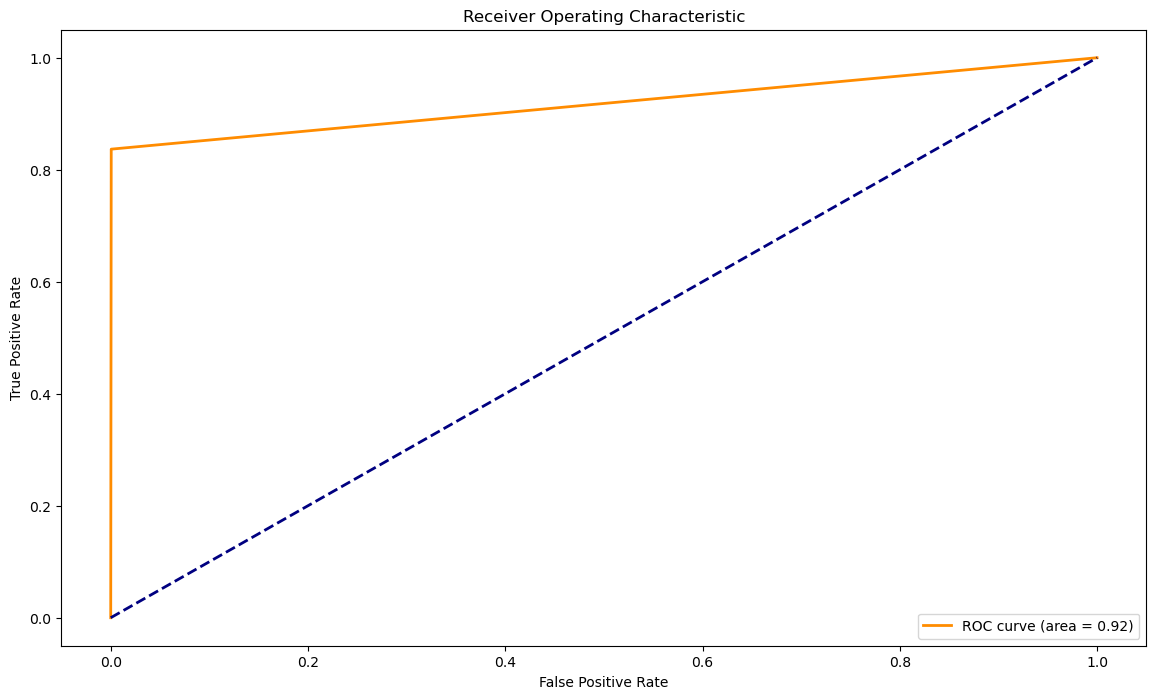

In [83]:
# Train the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Precision: This metric measures how many of the predicted positive class labels (1) were actually correct. 
Recall: This metric measures how many of the actual positive class labels (1) were correctly identified by the model.
Here, recall for class 1 (0.84) is higher than for the Logistic Regression model (0.58) in the previous example. This means that the Decision Tree model identified a larger portion of the actual class 1 data points compared to Logistic Regression.
F1-score: This metric is a harmonic mean of precision and recall, combining both metrics into a single score.
Support: This shows the total number of data points for each class in the test set.
Confusion Matrix:

Rows: Represent the actual class labels (ground truth).
Columns: Represent the predicted class labels by the model.
Values:
[[56835, 29]]: Out of 56864 actual class 0 data points, the model correctly predicted 56835 (true negatives) and misclassified 29 as class 1 (false positives).
[[16, 82]]: Out of 98 actual class 1 data points, the model correctly predicted 82 (true positives) and missed 16 (false negatives).
ROC Curve (not shown in the provided output):

This curve visualizes the trade-off between true positive rate (TPR) and false positive rate (FPR) for different classification thresholds.
A higher AUC (Area Under the Curve) indicates better model performance.